In [1]:
import sys
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages/lib/python/')
import ants
import os
import bigbadbrain as bbb
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy
from scipy.ndimage.filters import gaussian_filter
%matplotlib inline

In [2]:
plt.rcParams.update({'font.size': 20})

In [3]:
root_directory = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/'

# Load IBNWB Template

In [93]:
template_file = os.path.join(root_directory, '2019_nov_meanbrain_2', 'IBNWB.nrrd')
template = ants.image_read(template_file)

In [94]:
template

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (905, 513, 136)
	 Spacing    : (0.64, 0.64, 1.41)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

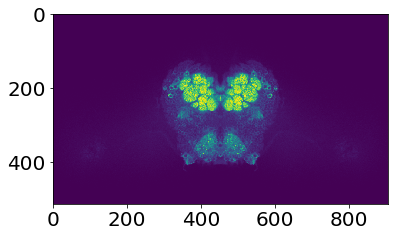

In [95]:
plt.imshow(template.numpy()[:,:,10].T)

In [96]:
# Flip Z-axis
template = template.numpy()[:,:,::-1]

In [106]:
# Cut off optic lobes
template = template[150:-150,:-200,:]

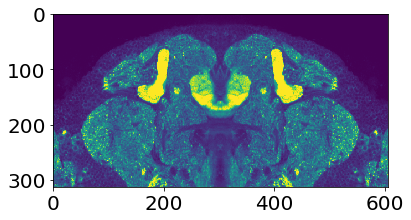

In [105]:
plt.imshow(template[150:-150,:-200,90].T)

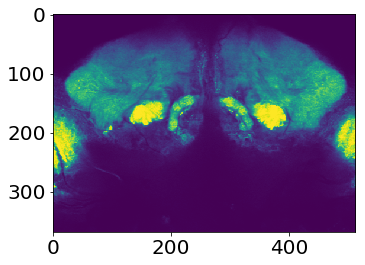

In [55]:
plt.imshow(anatomy_ants[:,:,80].T)

In [107]:
# Set resolution
template = ants.from_numpy(template)
ants.set_spacing(template, (0.64, 0.64, 1.41))

In [43]:
# Resample image to more similar resolution
#template = template.resample_image((1,1,1))

# Load individual anatomy

In [45]:
anatomy_file = os.path.join(root_directory, 'fly_25', 'anat_0', 'anatomy.nii')
anatomy = bbb.load_numpy_brain(anatomy_file)


~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 422.60 ms


### Create Ants brains with correct pixel sizes

In [48]:
anatomy_xml = os.path.join(root_directory, 'fly_25', 'anat_0', 'anatomy.xml')
anatomy_ants = ants.from_numpy(anatomy)
anatomy_ants.set_spacing(bbb.get_resolution(anatomy_xml))

In [49]:
slave = ants.n4_bias_field_correction(anatomy_ants)

In [108]:
master = template
anatomy2template = {}
MI_before = {}
MI_after = {}

grad_steps = 0.2
flow_sigma = 10
total_sigma = 0
aff_sampling = 32
syn_sampling = 256
verbose = True

t0 = time.time()
slave2master = ants.registration(master,
                                 slave,
                                 type_of_transform='SyN',
                                 syn_sampling=syn_sampling,
                                 flow_sigma=flow_sigma,
                                 total_sigma=total_sigma,
                                 grad_steps=grad_steps)
#anatomy2template[syn_sampling] = slave2master
#MI_after[anat] = ants.image_mutual_information(master,slave2master['warpedmovout'])
print('COMPLETE. Duration: {:0.0f} sec'.format(time.time()-t0))

COMPLETE. Duration: 239 sec


In [110]:
folder = os.path.join(root_directory, '2019_nov_meanbrain_2')
#os.mkdir(folder)


file = os.path.join(folder, 'IBNWB_noSEZ.nii')
bbb.save_brain(file, template.numpy())


~~ save_brain ~~
Current memory usage: 6.38GB
save_brain done. Duration: 563.19 ms


In [109]:
folder = os.path.join(root_directory, '2019_nov_meanbrain_2')
#os.mkdir(folder)


file = os.path.join(folder, 'anat2IBNWB_noSEZ.nii')
bbb.save_brain(file, slave2master['warpedmovout'].numpy())


~~ save_brain ~~
Current memory usage: 6.38GB
save_brain done. Duration: 421.81 ms


In [87]:
file

'/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/2019_nov_meanbrain_2/itohalf_trim.nii'